In [14]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim: int, output_dim: int) -> None:
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x: torch.tensor) -> torch.tensor:
        return self.linear(x)


model = LinearRegressionModel(1, 1).to(device)
print(model)

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [33]:
def train_loop(model: LinearRegressionModel, xs: torch.tensor, ys: torch.tensor, optimizer: torch.optim.Optimizer, loss_fn: torch.nn.Module, epochs: int) -> None:
    model.train()
    for epoch in range(epochs):
        # Forward pass
        outputs = model(xs)
        loss = loss_fn(outputs, ys)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}')

In [35]:
x: torch.tensor = 2 * torch.rand(100, 1, device=device)
y: torch.tensor = 4 + 3 * x + torch.randn(100, 1, device=device)

epochs = 1000
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.MSELoss()

train_loop(model, x, y, optimizer, loss_fn, epochs)

Epoch [100/1000], Loss: 1.2746785879135132
Epoch [200/1000], Loss: 1.273182988166809
Epoch [300/1000], Loss: 1.272415280342102
Epoch [400/1000], Loss: 1.272019863128662
Epoch [500/1000], Loss: 1.2718160152435303
Epoch [600/1000], Loss: 1.2717112302780151
Epoch [700/1000], Loss: 1.2716572284698486
Epoch [800/1000], Loss: 1.2716293334960938
Epoch [900/1000], Loss: 1.271614909172058
Epoch [1000/1000], Loss: 1.2716076374053955


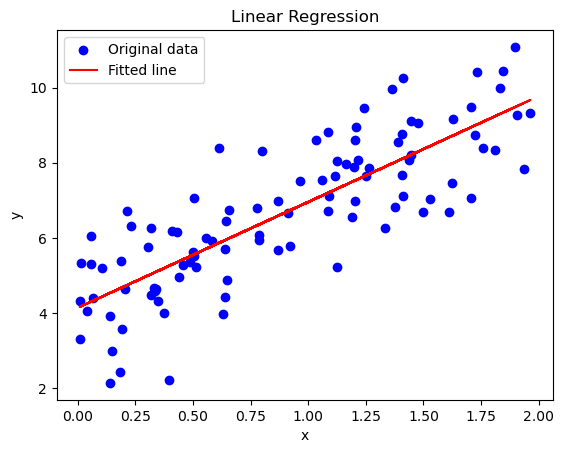

In [42]:
def plot_results(model: LinearRegressionModel, x: torch.tensor, y: torch.tensor) -> None:
    model.eval()
    y_pred = model(x).detach().cpu().numpy()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.scatter(x.cpu().numpy(), y.cpu().numpy(),
                label='Original data', color='blue')
    plt.plot(x.cpu().numpy(), y_pred, label='Fitted line', color='red')
    plt.legend()
    plt.show()


plot_results(model, x, y)